# Statsitical Learning - Linear Regression (Julia)

In [1]:
using RDatasets
using DataFrames
using CSV
using Lathe
using GLM
using Statistics
using Gadfly
using MLBase
using StableRNGs
using Polynomials

In [2]:
boston = dataset("MASS","Boston")
describe(boston)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,Crim,3.61352,0.00632,0.25651,88.9762,0,Float64
2,Zn,11.3636,0.0,0.0,100.0,0,Float64
3,Indus,11.1368,0.46,9.69,27.74,0,Float64
4,Chas,0.06917,0,0.0,1,0,Int64
5,NOx,0.554695,0.385,0.538,0.871,0,Float64
6,Rm,6.28463,3.561,6.2085,8.78,0,Float64
7,Age,68.5749,2.9,77.5,100.0,0,Float64
8,Dis,3.79504,1.1296,3.20745,12.1265,0,Float64
9,Rad,9.54941,1,5.0,24,0,Int64


## Linear Regression

In [3]:
fm = @formula(MedV ~ LStat)
lR = lm(fm,boston)

#Produces coefficent, std error, t stat , confidence interval
#As P(t) << 1 can reject null hypothesis (no relationship)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MedV ~ 1 + LStat

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  34.5538     0.562627    61.42    <1e-99   33.4485   35.6592
LStat        -0.950049   0.0387334  -24.53    <1e-87   -1.02615  -0.873951
──────────────────────────────────────────────────────────────────────────

In [4]:
r2(lR) #R^2 stat

#Decent model > 54%

0.54414629758648

In [5]:
predict(lR, DataFrame(LStat = [5,10,15]),interval=:confidence)

,prediction,lower,upper
,Float64?,Float64?,Float64?
1,29.8036,29.0074,30.5998
2,25.0533,24.4741,25.6326
3,20.3031,19.7316,20.8746


In [6]:
predict(lR, DataFrame(LStat = [5,10,15]),interval=:prediction) #A wider version of the Confidence interval

,prediction,lower,upper
,Float64?,Float64?,Float64?
1,29.8036,17.5657,42.0415
2,25.0533,12.8276,37.2791
3,20.3031,8.07774,32.5285


In [7]:
lRVal = coef(lR) #Use functions from GLM to access elements

2-element Vector{Float64}:
 34.55384087938313
 -0.9500493537579926

Both the CI and PI are centered about the same values ie a LStat predictor of 10 gives 25.053 MedV, but PI have a larger interval.

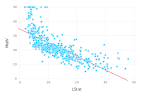

In [8]:
Gadfly.plot(boston, x=:LStat,y=:MedV, Geom.point,intercept=[lRVal[1]],slope=[lRVal[2]],Geom.abline(color="red"))

## Error

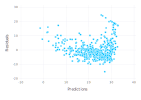

In [9]:
Gadfly.plot(x=predict(lR),y=residuals(lR),Guide.xlabel("Predictions"),Guide.ylabel("Residuals"))        

No easy way to calculate leverage in Julia or an equiavlent to the hatvalues func in R.

## Multiple Predictors

The syntax {\R{lm(y  ∼  x1 + x2 + x3)}} is used to fit a model with three predictors, x1, x2, and x3

In [10]:
fm = @formula(MedV ~ LStat+Age)
lR = lm(fm,boston)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MedV ~ 1 + LStat + Age

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error       t  Pr(>|t|)   Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  33.2228      0.730847    45.46    <1e-99  31.7869     34.6586
LStat        -1.03207     0.0481907  -21.42    <1e-72  -1.12675    -0.937389
Age           0.0345443   0.0122255    2.83    0.0049   0.0105251   0.0585636
─────────────────────────────────────────────────────────────────────────────

In [11]:
lR = lm(term(:MedV) ~ sum(term.([1;names(boston, Not(:MedV))])),boston) #Use terms to include all predictors

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MedV ~ 1 + Crim + Zn + Indus + Chas + NOx + Rm + Age + Dis + Rad + Tax + PTRatio + Black + LStat

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
                     Coef.  Std. Error       t  Pr(>|t|)     Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)   36.4595       5.10346       7.14    <1e-11   26.4322       46.4868
Crim          -0.108011     0.032865     -3.29    0.0011   -0.172584     -0.0434383
Zn             0.0464205    0.0137275     3.38    0.0008    0.0194488     0.0733921
Indus          0.0205586    0.0614957     0.33    0.7383   -0.100268      0.141385
Chas           2.68673      0.86158       3.12    0.0019    0.993904      4.37956
NOx          -17.7666       3

VIF is used to determine correlation between predictors, no easy way to do this in Julia has to be done manually, ie build each model and take the R^2 term.

### Interaction

In [12]:
fm = @formula(MedV ~ LStat*Age) #* gives combined and singular 
lR = lm(fm,boston)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MedV ~ 1 + LStat + Age + LStat & Age

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      t  Pr(>|t|)     Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)  36.0885       1.46984    24.55    <1e-87  33.2007       38.9763
LStat        -1.39212      0.167456   -8.31    <1e-15  -1.72112      -1.06312
Age          -0.00072086   0.0198792  -0.04    0.9711  -0.0397775     0.0383358
LStat & Age   0.00415595   0.0018518   2.24    0.0252   0.000517728   0.00779418
────────────────────────────────────────────────────────────────────────────────

## Non Linear

In [25]:
fm = @formula(MedV ~ LStat)
lRSimp = lm(fm,boston)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MedV ~ 1 + LStat

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  34.5538     0.562627    61.42    <1e-99   33.4485   35.6592
LStat        -0.950049   0.0387334  -24.53    <1e-87   -1.02615  -0.873951
──────────────────────────────────────────────────────────────────────────

In [26]:
fm = @formula(MedV ~ LStat+LStat^2)
lRquad = lm(fm,boston)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MedV ~ 1 + LStat + :(LStat ^ 2)

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  42.862      0.872084     49.15    <1e-99  41.1486     44.5754
LStat        -2.33282    0.123803    -18.84    <1e-59  -2.57606    -2.08959
LStat ^ 2     0.0435469  0.00374515   11.63    <1e-27   0.0361888   0.050905
────────────────────────────────────────────────────────────────────────────

In [27]:
ftest(lRSimp.model,lRquad.model) #Compare models

F-test: 2 models fitted on 506 observations
────────────────────────────────────────────────────────────────────────
     DOF  ΔDOF         SSR        ΔSSR      R²     ΔR²        F*   p(>F)
────────────────────────────────────────────────────────────────────────
[1]    3        19472.3814              0.5441                          
[2]    4     1  15347.2432  -4125.1383  0.6407  0.0966  135.1998  <1e-27
────────────────────────────────────────────────────────────────────────

Shows as the p value is near 0, strong evidence quad formula is better

In [15]:
# No easy method to use poly in julia instead build your own poly schema via Stats Models (Differs from R version)

fm = @formula(MedV ~ LStat+LStat^2+LStat^3+LStat^4+LStat^5)
lRquad = lm(fm,boston)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MedV ~ 1 + LStat + :(LStat ^ 2) + :(LStat ^ 3) + :(LStat ^ 4) + :(LStat ^ 5)

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────
                   Coef.     Std. Error       t  Pr(>|t|)     Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.0         NaN            NaN       NaN     NaN           NaN
LStat        15.8973        0.458112      34.70    <1e-99   14.9972       16.7973
LStat ^ 2    -2.60236       0.111004     -23.44    <1e-81   -2.82045      -2.38427
LStat ^ 3     0.167498      0.0091596     18.29    <1e-56    0.149502      0.185494
LStat ^ 4    -0.00472568    0.000307712  -15.36    <1e-43   -0.00533024   -0.00412112
LStat ^ 5     4.85095e-5    3.60338e-6    13.

In [16]:
fm = @formula(MedV ~ log(Rm))
lRquad = lm(fm,boston)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MedV ~ 1 + :(log(Rm))

Coefficients:
─────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error       t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  -76.4878     5.02772  -15.21    <1e-42   -86.3657   -66.6099
log(Rm)       54.0546     2.73946   19.73    <1e-63    48.6724    59.4367
─────────────────────────────────────────────────────────────────────────

## Dummy Variables

In [17]:
carSeats = dataset("ISLR","Carseats")

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age
,Float64,Float64,Float64,Float64,Float64,Float64,Cat…,Float64
1,9.5,138.0,73.0,11.0,276.0,120.0,Bad,42.0
2,11.22,111.0,48.0,16.0,260.0,83.0,Good,65.0
3,10.06,113.0,35.0,10.0,269.0,80.0,Medium,59.0
4,7.4,117.0,100.0,4.0,466.0,97.0,Medium,55.0
5,4.15,141.0,64.0,3.0,340.0,128.0,Bad,38.0
6,10.81,124.0,113.0,13.0,501.0,72.0,Bad,78.0
7,6.63,115.0,105.0,0.0,45.0,108.0,Medium,71.0
8,11.85,136.0,81.0,15.0,425.0,120.0,Good,67.0
9,6.54,132.0,110.0,0.0,108.0,124.0,Medium,76.0


In [23]:
lRCarSeats = lm(Term(:Sales) ~ sum(term.([1;names(carSeats, Not(:Sales))]))+Term(:Income)&Term(:Advertising),carSeats) #Use terms to include all predictors

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

Sales ~ 1 + CompPrice + Income + Advertising + Population + Price + ShelveLoc + Age + Education + Urban + US + Income & Advertising

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────────
                             Coef.   Std. Error       t  Pr(>|t|)     Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)            5.93003      0.605972       9.79    <1e-19   4.73862       7.12143
CompPrice              0.0930737    0.00411287    22.63    <1e-72   0.0849873     0.10116
Income                 0.0106845    0.00259006     4.13    <1e-04   0.00559211    0.0157768
Advertising            0.0684098    0.0224821      3.04    0.0025   0.0242075     0.112612
Population     

Dummy variables are automatically included in a regression

Julia uses Contrast coding to select the dummy variable setup